<br><h1> <img src="https://serea2017.uniandes.edu.co/images/Logo.png" height="120" width="400" align="Center" /><br>

# MIIIA Modelos Avanzados 1: Ejercicio 15 MLP - 12 Jul 2020

                     Integrantes             Code
           - Luis Jorge Garcia Camargo        201920053
           - Jairo Alberto Pedraza Corredor   201924260
           - Nidia Marcela Ortiz Sandoval     199713132
           - Carlos Andres Paez Rojas         201924257

# Exercise 15.1

 Train a Neural Network with two hidden layers of size 4 each. Include the mathematical model that is used.

In [19]:
# Import the required packages
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy
#from sklearn.linear_model import Perceptron

In [20]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model

### Defining the neural network structure ####

Define three variables:
    - n_x: the size of the input layer
    - n_h: the size of the hidden layer 
    - n_y: the size of the output layer

In [21]:
def layer_sizes(X, Y, hidden_neurons,hidden_neurons_2):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer 1
    n_h_2 -- the size of the hidden layer 2
    n_y -- the size of the output layer
    """
    n_x = X.shape[0] # size of input layer
    n_h = hidden_neurons
    n_h_2 = hidden_neurons_2
    n_y = Y.shape[0] # size of output layer
    
    return (n_x, n_h,n_h_2, n_y)

### Initialize the model's parameters ####

**Exercise**: Implement the function `initialize_parameters()`.

**Instructions**:
- Make sure your parameters' sizes are right. Refer to the neural network figure above if needed.
- You will initialize the weights matrices with random values. 
    - Use: `np.random.randn(a,b) * 0.01` to randomly initialize a matrix of shape (a,b).
- You will initialize the bias vectors as zeros. 
    - Use: `np.zeros((a,b))` to initialize a matrix of shape (a,b) with zeros.

In [22]:
# Solved Exercise: initialize_parameters

def initialize_parameters(n_x, n_h,n_h_2, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer 1
    n_h_2 -- size of the hidden layer 2
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_h_2,n_h)
                    b2 -- bias vector of shape (n_h_2, 1)
                    W3 -- weight matrix of shape (n_y, n_h_2)
                    b3 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(1) # we set up a seed so that your output matches ours although the initialization is random.
    
    W1 = np.random.randn(n_h,n_x) * 0.01
    b1 = np.zeros(shape=(n_h,1))
    W2 = np.random.randn(n_h_2,n_h) * 0.01
    b2 = np.zeros(shape=(n_h_2,1))
    W3 = np.random.randn(n_y,n_h_2) * 0.01
    b3 = np.zeros(shape=(n_y,1))
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_h_2, n_h))
    assert (b2.shape == (n_h_2, 1))
    assert (W3.shape == (n_y, n_h_2))
    assert (b3.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [23]:
#parametros=initialize_parameters(1000, 5,5, 1000)

### The Loop ####

**Question**: Implement `forward_propagation()`.

**Instructions**:
- Look above at the mathematical representation of your classifier.
- You can use the function `sigmoid()`. It is built-in (imported) in the notebook.
- You can use the function `np.tanh()`. It is part of the numpy library.
- The steps you have to implement are:
    1. Retrieve each parameter from the dictionary "parameters" (which is the output of `initialize_parameters()`) by using `parameters[".."]`.
    2. Implement Forward Propagation. Compute $Z^{[1]}, A^{[1]}, Z^{[2]}$ and $A^{[2]}$ (the vector of all your predictions on all the examples in the training set).
- Values needed in the backpropagation are stored in "`cache`". The `cache` will be given as an input to the backpropagation function.

In [24]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A3 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2","A2", "Z3", "A3"
    """
    # Retrieve each parameter from the dictionary "parameters"

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]

    # Implement Forward Propagation to calculate A2 (probabilities)
    Z1 = np.dot(W1,X)+b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 = np.tanh(Z2)
    Z3 = np.dot(W3,A2)+b3
    A3 = sigmoid(Z3)
    
    assert(A3.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2,
             "Z3": Z3,
             "A3": A3}
    
    return A3, cache

def sigmoid(x):
    """
    Compute the sigmoid of x
    Arguments:
    x -- A scalar or numpy array of any size.
    Return:
    s -- sigmoid(x)
    """
    s = 1/(1+np.exp(-x))
    return s

**Compute Cost**

In [25]:
def compute_cost(A3, Y, parameters):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A3 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2, b2, W3, b3
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    """
    
    m = Y.shape[1] # number of example

    # Compute the cross-entropy cost
    logprobs = np.multiply(Y,np.log(A3)) + np.multiply(1-Y,np.log(1-A3))
    cost = -1/m * np.sum(logprobs)
    
    cost = np.squeeze(cost)     # makes sure cost is the dimension we expect. 
                                # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    
    return cost

**Backward Propagation**

In [26]:
def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2","A2","Z3","A3".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1, W2 and W3 from the dictionary "parameters".
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]
       
    # Retrieve also A1 A2 and A3 from dictionary "cache".
    A1 = cache["A1"]
    A2 = cache["A2"]
    A3 = cache["A3"]
    
    # Backward propagation: calculate dW1, db1, dW2, db2,dW3, db3. 
    dZ3 = A3 - Y
    dW3 = 1/m * np.dot(dZ3,A2.T)
    db3 = 1/m*np.sum(dZ3,axis=1,keepdims=True)
    
    dZ2 = np.dot(W3.T,dZ3) * (1 - np.power(A2,2))
    dW2 = 1/m* np.dot(dZ2,A1.T)
    db2 = 1/m*np.sum(dZ2,axis=1,keepdims=True)
       
    dZ1 = np.dot(W2.T,dZ2) * (1 - np.power(A1,2))
    dW1 = 1/m* np.dot(dZ1,X.T)
    db1 = 1/m*np.sum(dZ1,axis=1,keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2,
             "dW3": dW3,
             "db3": db3}
    
    return grads

**Update Parameters**

In [27]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    dW3 = grads["dW3"]
    db3 = grads["db3"]
    
    # Update rule for each parameter
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W3 = W3 - learning_rate * dW3
    b3 = b3 - learning_rate * db3
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

**Integrate Parameters**

In [28]:
def nn_model(X, Y, n_h,n_h_2 ,num_iterations = 10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer 1
    n_h_2 -- size of the hidden layer 2
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(1)
    n_x = layer_sizes(X, Y,n_h,n_h_2)[0]
    n_y = layer_sizes(X, Y,n_h,n_h_2)[3]
    
    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h,n_h_2 ,n_y". Outputs = "W1, b1, W2, b2,W3, b3 parameters".
    parameters = initialize_parameters(n_x,n_h,n_h_2,n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):
         
        # Forward propagation. Inputs: "X, parameters". Outputs: "A3, cache".
        A3, cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A3, Y, parameters". Outputs: "cost".
        cost = compute_cost(A3,Y,parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters,cache,X,Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters,grads)

        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

**Predictions**

In [29]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    A3, cache = forward_propagation(X,parameters)
    predictions = A3 > 0.5
    
    return predictions

# Exercise 15.2

Test your MLP building blocks in real data

Use the information of the problem in the notebook: 14-Test our MLP building blocks in real data

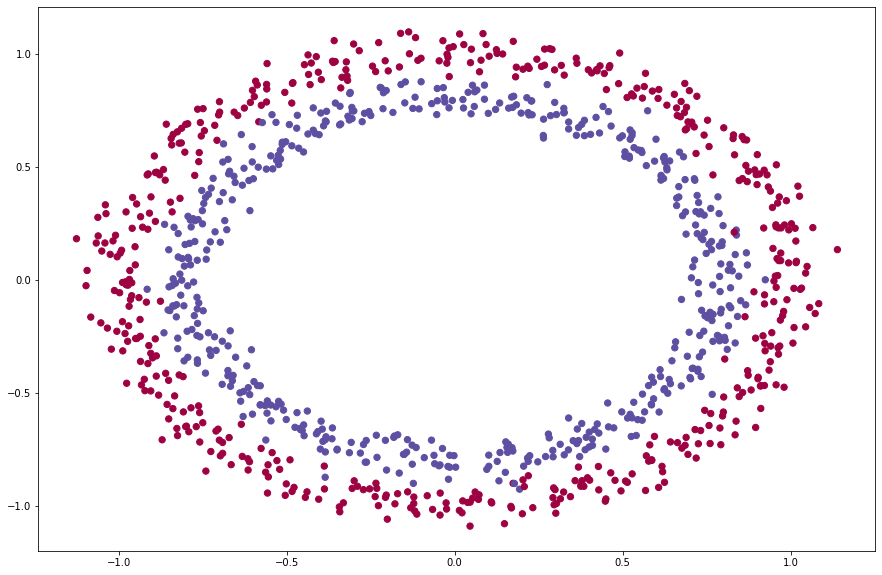

In [30]:
from sklearn.datasets.samples_generator import make_circles

x_train, y_train = make_circles(n_samples=1000, noise= 0.05, random_state=3)
plt.figure(figsize=(15, 10))
plt.scatter(x_train[:, 0], x_train[:,1], c=y_train, s=40, cmap=plt.cm.Spectral);

In [31]:
def plot_decision_boundary(model, X, y):
    plt.figure(figsize=(15,10))
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y.ravel(), s=80, cmap=plt.cm.Spectral)

Cost after iteration 0: 0.693147
Cost after iteration 1000: 0.693147
Cost after iteration 2000: 0.693147
Cost after iteration 3000: 0.693147
Cost after iteration 4000: 0.693147
Cost after iteration 5000: 0.693147
Cost after iteration 6000: 0.693147
Cost after iteration 7000: 0.693147
Cost after iteration 8000: 0.693147
Cost after iteration 9000: 0.693147


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

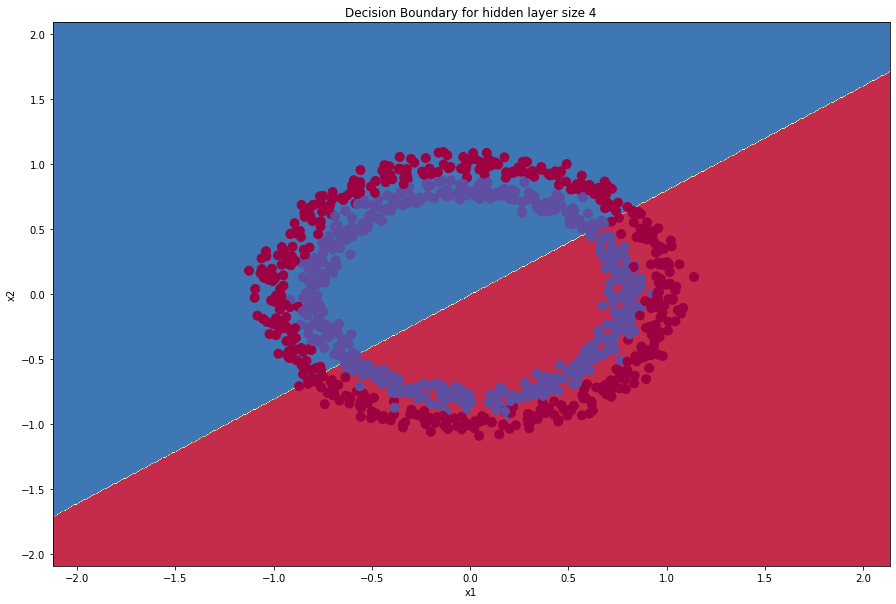

In [32]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(x_train.T, np.array([y_train.T]), n_h = 10,n_h_2 = 10, num_iterations = 10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), x_train.T, np.array([y_train.T]))
plt.title("Decision Boundary for hidden layer size " + str(4))

In [33]:
# Print accuracy
predictions = predict(parameters, x_train.T)
print ('Accuracy: %d' % float((np.dot( np.array([y_train.T]),predictions.T) + np.dot(1- np.array([y_train.T]),1-predictions.T))/float( np.array([y_train.T]).size)*100) + '%')

Accuracy: 50%


**Conclusión:** Al ajustar el mismo ejercicio del E14 adicionanado otra capa oculta con función de activación tanh, la red ajusta, pero el accuracy es supremamente bajo. Puede ser algo relacionado a la función de activación utilizada, pero en este caso los resultados de performance disminuyen significativamente. Para este caso de ajustar datos en forma circular, funciona mejor manteniendo una solo capa oculta en la Red LSTM. 